# polynomial regression

In [161]:
import pandas as pd  #used for providing structure 
import numpy as np     #used for providing mathematical function
import matplotlib.pyplot as plt  # #used for plotting graphs

In [227]:
data=pd.read_csv("D:/Kaustav MBA/TERM3/MachineLearning/Position_Salaries.csv")
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [163]:
#store data in form of dependent and independent variable seperately
X=data.iloc[ : , 1:2].values  # [:,1:2] isme 1:2 isliye liya h to read col X as matrix otherwise [:,1] will be treated as vector
Y=data.iloc[ : ,-1].values 

In [164]:
#split the dataset into training and test dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)   #testdataset is 20% i.e 0.2

In [166]:
#fit simple linear regression model
from sklearn.linear_model import LinearRegression
linregressor= LinearRegression() #linear regg class created
linregressor.fit(x_train,y_train) #fit model using x_train and y_train method called fit

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

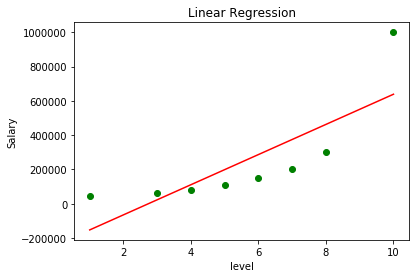

In [168]:
#visulalise linear regg model
plt.scatter(x_train, y_train,color='green')
plt.plot(X, linregressor.predict(X),  color="red")
plt.title('Linear Regression')
plt.xlabel('level')
plt.ylabel('Salary')
plt.show()

In [194]:
#add polynomial term to eqn
from sklearn.preprocessing import PolynomialFeatures 
#polynomial feature helps in addition of polynomial feature to simple linear regression model
polyreg=PolynomialFeatures(degree=4) #object of polynomial feature class
X_pol=polyreg.fit_transform(x_train)
#X_pol contains additional indpndt variables nt jst x bt x^2...x^4 (defined by degree=4))

In [201]:
X_pol #y= bo + b1*x1 + b2*x^2 + b3*x^3 + b4*x^4..i.e. col1=bo..col2=x1..col3=x^2..etc

array([[1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03]])

In [203]:
#fit the polynomial regg model
polreg=LinearRegression()
polreg.fit(X_pol,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

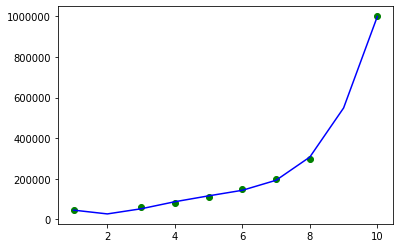

In [204]:
#visualise the polynomial regression results
plt.scatter(x_train,y_train,color='green')
plt.plot(X,polreg.predict(polyreg.fit_transform(X)),color="blue")
plt.show()

In [208]:
#predicted height from test dataset wrt simple linear regression
y_predicted_slr= linregressor.predict(x_test)

#model evaluation using R square for simple linear regression
from sklearn import metrics
r_square=metrics.r2_score(y_test,y_predicted_slr)
print('rsquare error wrt simple linear regression',r_square)

rsquare error wrt simple linear regression 0.8451346684575975


In [224]:
#predicted height from test dataset wrt Polynomial regression
y_predicted_pr= polreg.predict(polyreg.fit_transform(x_train))

#model evaluation using R square for  Polynomial regression
from sklearn import metrics
metrics.r2_score(y_test,y_predicted_pr)
print('rsquare error wrt Polynomial regression ',r_square)

ValueError: Found input variables with inconsistent numbers of samples: [2, 8]

In [235]:
#predict salary wrt level using linear regg
linregressor.predict([[12]])

array([814396.55172414])

In [238]:
#predict salary wrt level using polyregg
polreg.predict(polyreg.fit_transform([[12]]))

array([2949328.93694492])

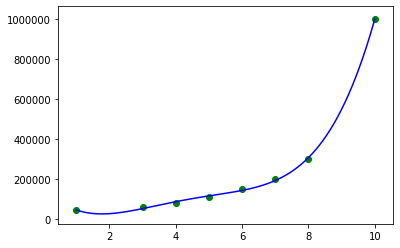

162437.01550387824 [      0.         -188149.59288997   84711.1945469   -13818.79834549
     806.57593376]


In [205]:
#CASE 2 : creating data set of our own
X_grid=np.linspace(min(X),max(X),1000)
X_grid=X_grid.reshape(len(X_grid),1)
plt.plot(X_grid,polreg.predict(polyreg.fit_transform(X_grid)),color="blue")
plt.scatter(x_train,y_train,color='green')
plt.show()
print(polreg.intercept_,polreg.coef_)